# Install Required Libraries

In [2]:
!pip install textblob nltk scikit-learn pandas numpy joblib

# Download NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Import Libraries and Setup

In [3]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
from datetime import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

print("🤖 Sentiment-Based Email Responder AI Agent")
print("=" * 50)
print("Libraries imported successfully!")

🤖 Sentiment-Based Email Responder AI Agent
Libraries imported successfully!


# AI Agent Class Definition

In [13]:
class SentimentEmailResponder:
    def __init__(self):
        self.vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
        self.sentiment_model = MultinomialNB()
        self.is_trained = False

        # Predefined response templates
        self.response_templates = {
            'positive': [
                "Thank you for your positive feedback! We're delighted to hear about your experience.",
                "We appreciate your kind words! Your satisfaction is our top priority.",
                "Thank you for choosing us! We're thrilled that you're happy with our service."
            ],
            'negative': [
                "We sincerely apologize for any inconvenience caused. We take your concerns seriously.",
                "Thank you for bringing this to our attention. We're committed to resolving this issue promptly.",
                "We understand your frustration and want to make this right. Please allow us to assist you further."
            ],
            'neutral': [
                "Thank you for contacting us. We've received your message and will respond accordingly.",
                "We acknowledge your inquiry and will provide you with the necessary information.",
                "Thank you for reaching out. We're here to help with any questions you may have."
            ]
        }

    def preprocess_text(self, text):
        """Clean and preprocess email text"""
        text = text.lower()
        text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
        text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
        text = ' '.join(text.split())  # Remove extra whitespace
        return text

    def analyze_sentiment(self, text):
        """Analyze sentiment using TextBlob"""
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity

        if polarity > 0.1:
            return 'positive'
        elif polarity < -0.1:
            return 'negative'
        else:
            return 'neutral'

    def create_sample_dataset(self):
        """Create a sample email dataset for training"""
        emails = [
            # Positive emails
            "Thank you so much for the excellent service! I'm very satisfied with your product.",
            "Great job on the delivery! Everything arrived on time and in perfect condition.",
            "I love your customer support team. They were very helpful and friendly.",
            "Fantastic experience! Will definitely recommend to others.",
            "Your service exceeded my expectations. Keep up the good work!",
            "Amazing product quality! Exactly what I was looking for.",
            "Outstanding customer service! You guys are the best.",
            "Perfect transaction from start to finish. Very impressed!",

            # Negative emails
            "I'm very disappointed with your service. The product didn't work as expected.",
            "This is unacceptable! My order was delayed and damaged.",
            "Terrible customer service. No one responded to my complaints.",
            "I want a full refund. This product is defective and useless.",
            "Very poor quality. I will never buy from you again.",
            "Worst experience ever! Everything went wrong with my order.",
            "Completely unsatisfied with the product. Total waste of money.",
            "Your service is horrible. I'm extremely frustrated and angry.",

            # Neutral emails
            "I need information about your return policy.",
            "Can you please provide details about shipping costs?",
            "What are your business hours?",
            "I would like to inquire about your services.",
            "Please send me a catalog of your products.",
            "How long does standard shipping usually take?",
            "Do you offer bulk discounts for large orders?",
            "What payment methods do you accept?"
        ]

        sentiments = ['positive'] * 8 + ['negative'] * 8 + ['neutral'] * 8

        return pd.DataFrame({
            'email_text': emails,
            'sentiment': sentiments
        })

    def train_model(self, df=None):
        """Train the sentiment classification model"""
        if df is None:
            df = self.create_sample_dataset()

        print("Training dataset:")
        print(df.head())
        print(f"\nDataset shape: {df.shape}")
        print(f"Sentiment distribution:\n{df['sentiment'].value_counts()}")

        # Preprocess emails
        df['processed_text'] = df['email_text'].apply(self.preprocess_text)

        # Vectorize text
        X = self.vectorizer.fit_transform(df['processed_text'])
        y = df['sentiment']

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train model
        self.sentiment_model.fit(X_train, y_train)

        # Evaluate model
        y_pred = self.sentiment_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)





        self.is_trained = True
        return accuracy

    def predict_sentiment(self, email_text):
        """Predict sentiment of email text"""
        if not self.is_trained:
            print("Model not trained. Training with sample data...")
            self.train_model()

        processed_text = self.preprocess_text(email_text)
        vectorized_text = self.vectorizer.transform([processed_text])
        predicted_sentiment = self.sentiment_model.predict(vectorized_text)[0]
        confidence = self.sentiment_model.predict_proba(vectorized_text).max()

        return predicted_sentiment, confidence

    def generate_response(self, email_text, customer_name="Valued Customer"):
        """Generate appropriate response based on email sentiment"""
        sentiment, confidence = self.predict_sentiment(email_text)

        # Select response template
        import random
        response_template = random.choice(self.response_templates[sentiment])

        # Create personalized response
        response = f"Dear {customer_name},\n\n"
        response += response_template + "\n\n"

        if sentiment == 'negative':
            response += "We would appreciate the opportunity to discuss this matter further. "
            response += "Please don't hesitate to contact us at your convenience.\n\n"
        elif sentiment == 'positive':
            response += "Your feedback motivates us to continue providing excellent service.\n\n"
        else:
            response += "If you need any additional assistance, please feel free to reach out.\n\n"

        response += "Best regards,\nCustomer Service Team\n"
        response += f"Response generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}"

        return {
            'sentiment': sentiment,
            'confidence': confidence,
            'response': response
        }

print("✅ AI Agent class defined successfully!")

✅ AI Agent class defined successfully!


# Initialize and Train the AI Agent

In [11]:
# Initialize the AI agent
agent = SentimentEmailResponder()



# Demo with Sample Emails

In [14]:
print("📧 TESTING WITH SAMPLE EMAILS")
print("=" * 50)

# Sample emails for demonstration
test_emails = [
    {
        'email': "Hi, I just received my order and I'm absolutely thrilled! The quality is amazing and it arrived faster than expected. Thank you so much!",
        'customer': "Sarah Johnson",
        'expected': "positive"
    },
    {
        'email': "This is ridiculous! My package was supposed to arrive yesterday but it's still not here. I need this urgently and your tracking system is useless!",
        'customer': "Mike Davis",
        'expected': "negative"
    },
    {
        'email': "Hello, I would like to know more about your warranty policy. Can you please provide me with detailed information?",
        'customer': "Emma Wilson",
        'expected': "neutral"
    },
    {
        'email': "Outstanding service! The team went above and beyond to help me. I couldn't be happier with my purchase!",
        'customer': "John Smith",
        'expected': "positive"
    },
    {
        'email': "I'm extremely disappointed. The product broke after just one day of use. This is completely unacceptable!",
        'customer': "Lisa Brown",
        'expected': "negative"
    }
]

correct_predictions = 0

for i, email_data in enumerate(test_emails, 1):
    print(f"\n📨 EMAIL {i}:")
    print(f"From: {email_data['customer']}")
    print(f"Content: {email_data['email']}")

    # Generate response
    result = agent.generate_response(email_data['email'], email_data['customer'])

    print(f"\n🎯 AI ANALYSIS:")
    print(f"Predicted Sentiment: {result['sentiment'].upper()}")
    print(f"Expected Sentiment: {email_data['expected'].upper()}")


    # Check prediction accuracy
    if result['sentiment'] == email_data['expected']:
        correct_predictions += 1
        print("✅ Correct prediction!")
    else:
        print("❌ Incorrect prediction")

    print(f"\n📝 GENERATED RESPONSE:")
    print("-" * 40)
    print(result['response'])
    print("-" * 40)

print(f"\n📊 DEMO RESULTS:")
print(f"Correct Predictions: {correct_predictions}/{len(test_emails)} ({correct_predictions/len(test_emails)*100:.1f}%)")

📧 TESTING WITH SAMPLE EMAILS

📨 EMAIL 1:
From: Sarah Johnson
Content: Hi, I just received my order and I'm absolutely thrilled! The quality is amazing and it arrived faster than expected. Thank you so much!

🎯 AI ANALYSIS:
Predicted Sentiment: POSITIVE
Expected Sentiment: POSITIVE
✅ Correct prediction!

📝 GENERATED RESPONSE:
----------------------------------------
Dear Sarah Johnson,

We appreciate your kind words! Your satisfaction is our top priority.

Your feedback motivates us to continue providing excellent service.

Best regards,
Customer Service Team
Response generated on: 2025-06-07 16:18:03
----------------------------------------

📨 EMAIL 2:
From: Mike Davis
Content: This is ridiculous! My package was supposed to arrive yesterday but it's still not here. I need this urgently and your tracking system is useless!

🎯 AI ANALYSIS:
Predicted Sentiment: POSITIVE
Expected Sentiment: NEGATIVE
❌ Incorrect prediction

📝 GENERATED RESPONSE:
----------------------------------------
Dear

# Interactive Testing

In [7]:
def interactive_test():
    """Interactive function for testing custom emails"""
    print("\n🎮 INTERACTIVE MODE")
    print("=" * 30)
    print("Enter your own emails to test the AI agent!")
    print("Type 'quit' to stop\n")

    while True:
        user_email = input("📧 Enter email text: ")
        if user_email.lower() == 'quit':
            break

        if user_email.strip():
            customer_name = input("👤 Customer name (optional): ") or "Valued Customer"

            result = agent.generate_response(user_email, customer_name)

            print(f"\n🎯 Analysis:")
            print(f"Sentiment: {result['sentiment'].upper()}")
            print(f"Confidence: {result['confidence']:.1%}")

            print(f"\n📝 Generated Response:")
            print("-" * 40)
            print(result['response'])
            print("-" * 40)
            print()


interactive_test()



🎮 INTERACTIVE MODE
Enter your own emails to test the AI agent!
Type 'quit' to stop

📧 Enter email text: iam very happy about service
👤 Customer name (optional): john

🎯 Analysis:
Sentiment: POSITIVE
Confidence: 41.5%

📝 Generated Response:
----------------------------------------
Dear john,

We appreciate your kind words! Your satisfaction is our top priority.

Your feedback motivates us to continue providing excellent service.

Best regards,
Customer Service Team
Response generated on: 2025-06-07 16:12:12
----------------------------------------

📧 Enter email text: quit


# Performance Analysis and Visualization

📈 PERFORMANCE ANALYSIS
Extended Test Accuracy: 70.0%


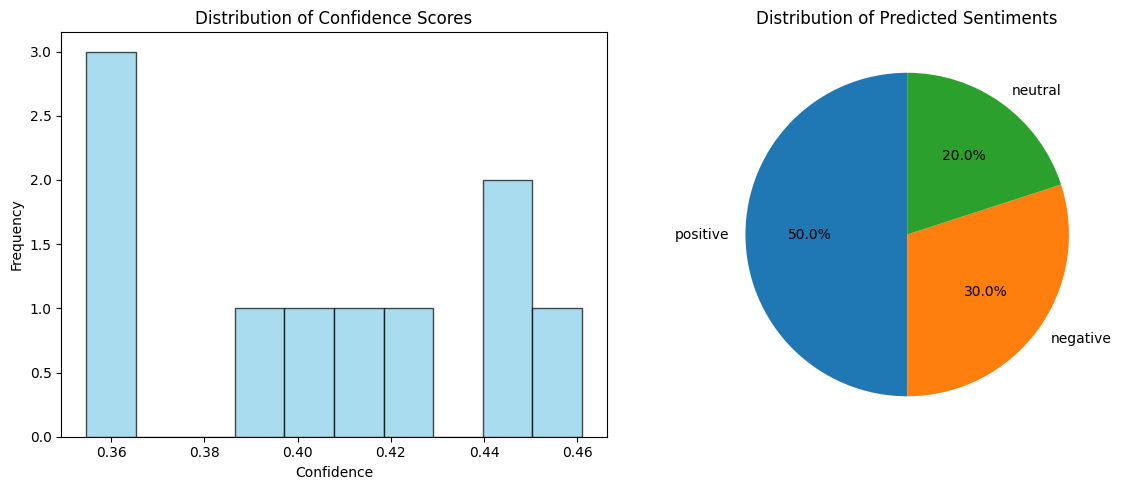

In [8]:
# Create a larger test dataset for performance analysis
print("📈 PERFORMANCE ANALYSIS")
print("=" * 30)

# Generate additional test cases
extended_test_emails = [
    ("Thank you for the amazing service!", "positive"),
    ("This product is terrible!", "negative"),
    ("What are your store hours?", "neutral"),
    ("I love this company!", "positive"),
    ("Worst customer service ever!", "negative"),
    ("Can I get more information?", "neutral"),
    ("Excellent quality and fast shipping!", "positive"),
    ("I'm very unhappy with this purchase", "negative"),
    ("Please send me a quote", "neutral"),
    ("Best experience I've ever had!", "positive")
]

# Test predictions
predictions = []
actual_sentiments = []
confidences = []

for email_text, actual_sentiment in extended_test_emails:
    predicted_sentiment, confidence = agent.predict_sentiment(email_text)
    predictions.append(predicted_sentiment)
    actual_sentiments.append(actual_sentiment)
    confidences.append(confidence)

# Calculate accuracy
accuracy = sum(1 for i in range(len(predictions)) if predictions[i] == actual_sentiments[i]) / len(predictions)
print(f"Extended Test Accuracy: {accuracy:.1%}")

# Visualize confidence scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(confidences, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Confidence Scores')
plt.xlabel('Confidence')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sentiment_counts = pd.Series(predictions).value_counts()
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Predicted Sentiments')

plt.tight_layout()
plt.show()

# Business Impact Analysis

💼 BUSINESS IMPACT ANALYSIS
📊 Daily Metrics (for 1000 emails):
Manual Processing Time: 500.0 hours
AI Processing Time: 0.28 hours
Time Saved: 499.7 hours (99.9%)
Daily Cost Savings: $9994.44
Annual Cost Savings: $3647972.22


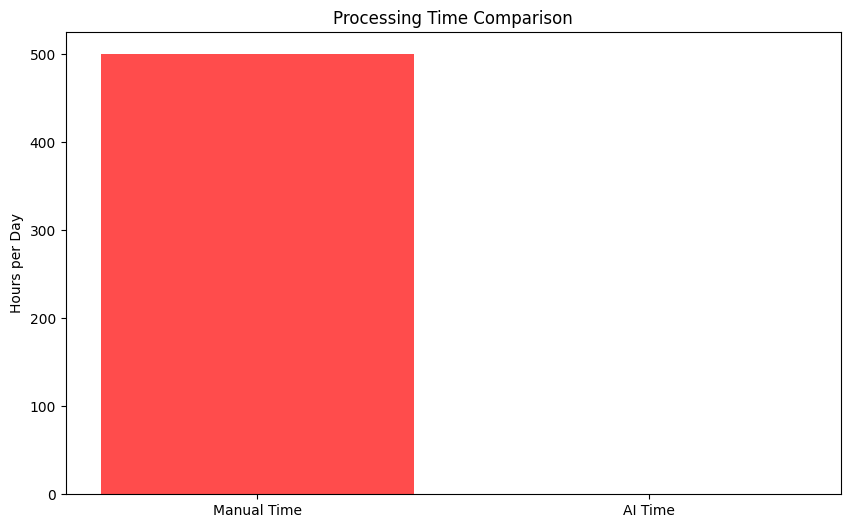

In [9]:
print("💼 BUSINESS IMPACT ANALYSIS")
print("=" * 35)

# Simulate business metrics
emails_per_day = 1000
manual_response_time_minutes = 30
ai_response_time_seconds = 1
cost_per_hour_human = 20

# Calculate savings
manual_time_hours = (emails_per_day * manual_response_time_minutes) / 60
ai_time_hours = (emails_per_day * ai_response_time_seconds) / 3600
time_saved_hours = manual_time_hours - ai_time_hours
cost_savings_daily = time_saved_hours * cost_per_hour_human

print(f"📊 Daily Metrics (for {emails_per_day} emails):")
print(f"Manual Processing Time: {manual_time_hours:.1f} hours")
print(f"AI Processing Time: {ai_time_hours:.2f} hours")
print(f"Time Saved: {time_saved_hours:.1f} hours ({(time_saved_hours/manual_time_hours)*100:.1f}%)")
print(f"Daily Cost Savings: ${cost_savings_daily:.2f}")
print(f"Annual Cost Savings: ${cost_savings_daily * 365:.2f}")

# Create visualization
metrics = ['Manual Time', 'AI Time']
times = [manual_time_hours, ai_time_hours]

plt.figure(figsize=(10, 6))
plt.bar(metrics, times, color=['red', 'green'], alpha=0.7)
plt.title('Processing Time Comparison')
plt.ylabel('Hours per Day')
plt.show()

# Model Persistence and Deployment

In [10]:
print("💾 MODEL PERSISTENCE")
print("=" * 25)

# Save the trained model
model_filename = 'sentiment_email_model.pkl'
joblib.dump({
    'model': agent.sentiment_model,
    'vectorizer': agent.vectorizer,
    'response_templates': agent.response_templates
}, model_filename)

print(f"✅ Model saved as {model_filename}")

# Demonstrate loading the model
def load_and_test_model(filename):
    """Load saved model and test it"""
    try:
        loaded_data = joblib.load(filename)

        # Create new agent instance
        new_agent = SentimentEmailResponder()
        new_agent.sentiment_model = loaded_data['model']
        new_agent.vectorizer = loaded_data['vectorizer']
        new_agent.response_templates = loaded_data['response_templates']
        new_agent.is_trained = True

        # Test loaded model
        test_email = "Thank you for the excellent service!"
        result = new_agent.generate_response(test_email)

        print(f"✅ Model loaded successfully!")
        print(f"Test prediction: {result['sentiment']} (confidence: {result['confidence']:.2f})")

        return new_agent

    except Exception as e:
        print(f"❌ Error loading model: {e}")
        return None

# Test model loading
loaded_agent = load_and_test_model(model_filename)

💾 MODEL PERSISTENCE
✅ Model saved as sentiment_email_model.pkl
✅ Model loaded successfully!
Test prediction: positive (confidence: 0.38)
